# Understanding your Data
First we need to load our data and perform some basic analysis to understand it. This is called Exploratory Data Analysis in short EDA. We need pandas library for loading our data.

## Importing necessary libraries and moduls

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Seaborn settings
#sns.set(style='whitegrid', rc={"grid.linewidth": 0.1}) # plt.style.use('bmh')
sns.set_context("paper", font_scale=2)  #rc={"font.size":52,"axes.titlesize":15,"axes.labelsize":22}font_scale=2,
#plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.
color = sns.color_palette("Set2", 6) 
# Available seaborn palette names: deep, muted, bright, pastel, dark, colorblind
# Other options: name of matplotlib cmap, 'hls', 'husl', or a list of colors in any format matplotlib accepts
%matplotlib inline

In [4]:
train_df = pd.read_csv("DataSets/train.csv")
test_df = pd.read_csv("DataSets/test.csv")

In [5]:
row1 = "p"
row2 = "y"
row3 = "t"
row4 = "h"
row5 = "o"
row6 = "n"

In [6]:
 rows= ["p", "y", "t", "h", "o", "n"]

In [7]:
for number in range(1,7):
    print(eval("row"+str(number)))

p
y
t
h
o
n


In [8]:
row1, col1 = train_df.shape
row2, col2 = test_df.shape
total_rows = row3 = row1 + row2 
col3 = col1
for row, data in zip(range(1,4),["train", "test", "total"]):
    print("There are {} rows and {} columns in {} data.".format(eval("row"+str(row)), eval("col"+str(row)), data))

There are 891 rows and 12 columns in train data.
There are 418 rows and 11 columns in test data.
There are 1309 rows and 12 columns in total data.


## Exploratory Data Analysis (EDA)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.isna().apply(pd.value_counts)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
False,891.0,891.0,891.0,891.0,891.0,714,891.0,891.0,891.0,891.0,204,889
True,NaN,NaN,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,687,2


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. There are too many missing values in Cabin Column. It could be dropped.
2. Age, Fare and Embarked columns have also some missing values. But they could be easily filled.

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


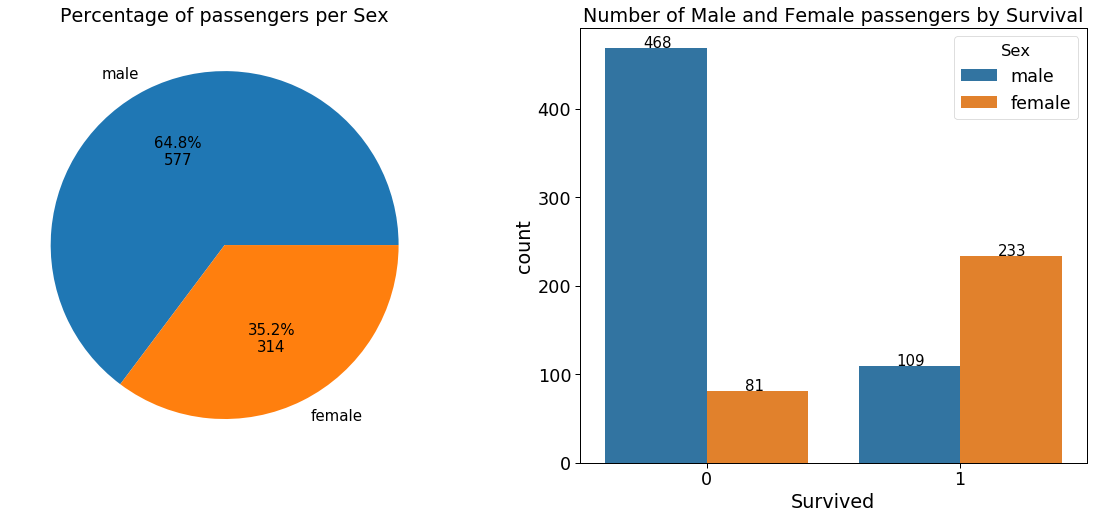

In [14]:
values= list(train_df["Sex"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
train_df["Sex"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of passengers per Sex",
                                           textprops={'fontsize': 15})

plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(x="Survived", hue="Sex", data=train_df)
plt.title("Number of Male and Female passengers by Survival")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+0.7), size=15)

1. 577 passengers (%65) were male and 314 passengers (%35) were female. 
2. According to the training data females are most likely to survive.

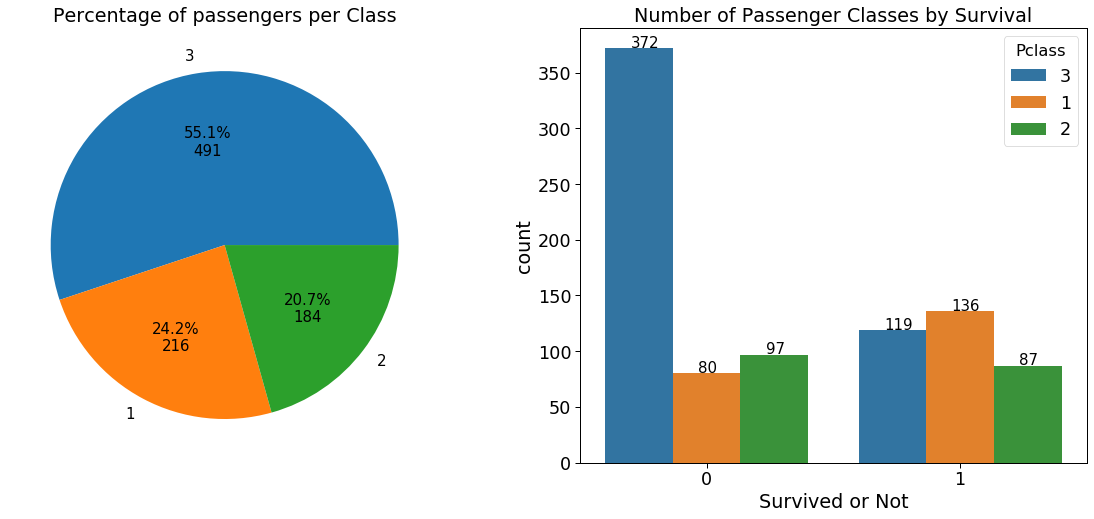

In [15]:
values= list(train_df["Pclass"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
train_df["Pclass"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of passengers per Class",
                                           textprops={'fontsize': 15})
plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(x="Survived", hue="Pclass", data=train_df, hue_order=[3,1,2])
plt.title("Number of Passenger Classes by Survival")
plt.xlabel("Survived or Not")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+0.7), size=15)

1. More than half of the total passengers (491 - %55) are 3rd Class.
2. According to the training data most of the 3rd Class passengers are not survived.

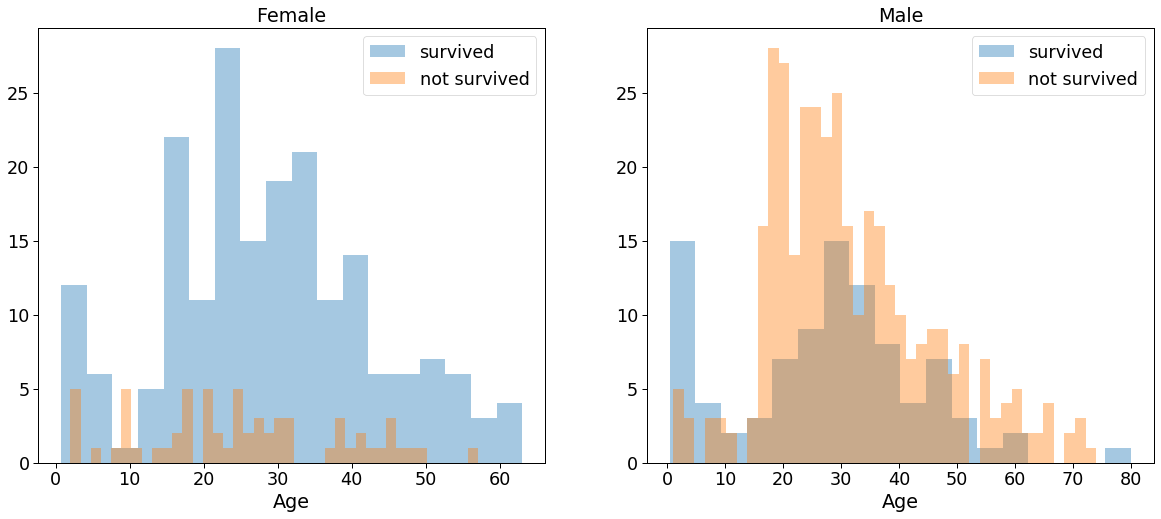

In [16]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## Dealing with Missing Values

### Embarked Column

In [ ]:
train_df

In [17]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [33]:
train_df.Cabin

0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [20]:
embarked_mode = train_df.Embarked.mode()[0]

In [21]:
train_df.Embarked.fillna(embarked_mode, inplace=True)

In [22]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
train_df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

### Cabin Column

In [17]:
train_df.Cabin.isnull().sum()/len(train_df) * 100

77.10437710437711

In [34]:
train_df.drop(columns="Cabin", inplace=True)

In [35]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [36]:
test_df.drop(columns="Cabin", inplace=True)

In [37]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


### Age Column

In [41]:
round(train_df.Age.mean())

30.0

In [43]:
mean_age = np.ceil(train_df.Age.mean())

In [45]:
train_df.Age.fillna(mean_age, inplace=True)

In [46]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
test_df.Age.fillna(mean_age, inplace=True)

In [48]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [49]:
test_df.shape

(418, 10)

### Fare Column

In [50]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)

## Feature Engineering

### Name Column

In [31]:
train_df.Name[:3]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [ ]:
\w = [A-Za-z0-9_]

In [58]:
train_df.Name.str.extract(",\s(\w+)\.", expand=False).value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Col', 'Major',
       'Don', 'Sir', 'Lady', 'Mme', 'Jonkheer', 'Ms', 'Capt'],
      dtype='object')

In [46]:
titles_found = train_df.Name.str.extract(",\s(\w+)\.", expand=False).value_counts().index.tolist()
titles_found

['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Dr',
 'Rev',
 'Mlle',
 'Col',
 'Major',
 'Don',
 'Lady',
 'Jonkheer',
 'Capt',
 'Mme',
 'Ms',
 'Sir']

In [47]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    #dataset['Title'] = dataset['Title'].fillna(0)
#train_df = train_df.drop(['Name'], axis=1)
#test_df = test_df.drop(['Name'], axis=1)

In [48]:
train_df.Title.value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

### Sex Column

In [56]:
for dataset in data:
    dataset.Sex = dataset.Sex.map({"male":0, "female":1})

In [57]:
train_df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
### Embarked Column

In [60]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Dropping unnecessary Columns

In [50]:
#train_df = train_df.drop(['PassengerId'], axis=1)
for dataset in data:
    dataset.drop(columns = ['PassengerId','Name', 'Ticket'], inplace=True)

## Dealing with data types

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [64]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,0,3
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,3


# Modeling

### High Correlation Check

In [65]:
corr = train_df.corr()

In [66]:
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

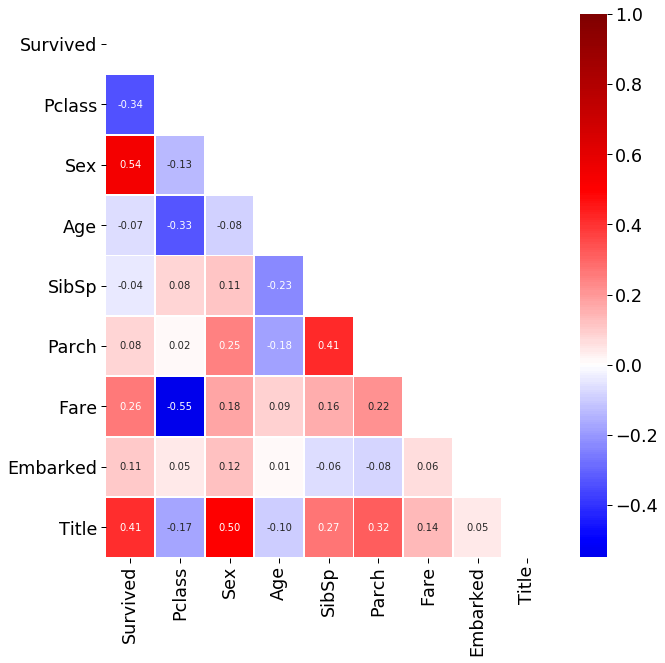

In [67]:
# Adding the mask to the heatmap and see the corr matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cm.seismic, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Splitting and Fitting data set

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [69]:
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=59)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(632, 36) (632,)
(259, 36) (259,)


In [539]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", n_estimators=21, seed=59)

In [290]:
xgb_cl.fit(X_train, y_train)

print("Score on train data: ", xgb_cl.score(X_test, y_test))

preds = xgb_cl.predict(X_test)

#rmse_xgb_tree = np.sqrt(mean_squared_error(train["Survived"], train["preds"]))
#print("RMSE:", rmse_xgb_tree, "1-RMSE:", 1.0-rmse_xgb_tree)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7915057915057915
accuracy: 0.791506


### Tuning the XGB Model

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
# Instantiate the classifier: dt_clf_6
dt_clf_6 = DecisionTreeClassifier(max_depth=6)

# Fit the classifier to the training set
dt_clf_6.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_11
y_pred_6 = dt_clf_6.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_6==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.7374517374517374


In [292]:
# Create the DMatrix: survive_dmatrix
survive_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":6}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=survive_dmatrix, params=params, nfold=3, num_boost_round=21, metrics="error", as_pandas=True, seed=59)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

C:\Users\buono\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\buono\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.120090         0.007936         0.178451        0.014285
1           0.113356         0.008286         0.169472        0.018305
2           0.108867         0.009152         0.169472        0.020816
3           0.105500         0.011691         0.171717        0.021472
4           0.105499         0.011111         0.175084        0.023966
5           0.099888         0.005204         0.170595        0.027537
6           0.098205         0.006919         0.168350        0.031224
7           0.095960         0.007142         0.169472        0.032798
8           0.090348         0.004828         0.170595        0.030157
9           0.088665         0.007054         0.169472        0.025984
10          0.084736         0.003968         0.170595        0.027537
11          0.083053         0.005204         0.167228        0.024945
12          0.079686         0.004828         0.171717        0.024435
13    

In [293]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=survive_dmatrix, params=params, nfold=11, num_boost_round=21, metrics="auc", as_pandas=True, seed=59)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.898775       0.005881       0.868050      0.037169
1         0.915431       0.005385       0.870422      0.034830
2         0.926192       0.006871       0.866290      0.041183
3         0.933353       0.006086       0.869331      0.040937
4         0.938171       0.005009       0.870616      0.042330
5         0.943562       0.004800       0.868677      0.040751
6         0.948957       0.005497       0.864024      0.043282
7         0.953358       0.006139       0.863564      0.043387
8         0.956882       0.006101       0.864088      0.042832
9         0.960291       0.004157       0.863879      0.042157
10        0.962268       0.004504       0.862933      0.039813
11        0.964623       0.004851       0.862318      0.039558
12        0.966554       0.004494       0.860982      0.040826
13        0.968355       0.004341       0.859878      0.041067
14        0.969974       0.003596       0.859794      0

## Re Tuning XGB

In [548]:
xgb_model = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=11, 
                      gamma=10)

In [295]:
xgb_model.fit(X_train, y_train)

print("Score on train data: ", xgb_model.score(X_test, y_test))

preds = xgb_model.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7799227799227799
accuracy: 0.779923


## Submission of the Data

In [557]:
titanic_preds= model.predict(test)

In [558]:
len(titanic_preds)

418

In [559]:
passenger_id = test_data.PassengerId
len(passenger_id)

418

In [560]:
titanic_submission_karaarslan = pd.DataFrame({'PassengerId':passenger_id, 'Survived':titanic_preds})

In [561]:
titanic_submission_karaarslan.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [562]:
titanic_submission_karaarslan.to_csv('Karaarslan_Titanic_09.csv', index=False)

In [302]:
df = pd.read_csv('Karaarslan_Titanic_06.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Random Forest Classifier

In [261]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 180, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [262]:
print("Score on train data: ", model.score(X_test, y_test))

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.7847533632286996
accuracy: 0.784753


In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7932960893854749

In [213]:
RF_pred = model.predict(test)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.80      0.71      0.75        79

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

[[86 14]
 [23 56]]


In [215]:
# Feature importance
fi = feat_importance(model, X_train)
fi[:,10]

NameError: name 'feat_importance' is not defined

## Using TPOT to find best model

In [218]:
train.rename(columns = {"Survived": "class"}, inplace = True)

In [219]:
y_tpot = train["class"]
X_tpot = train.drop(["class"], axis=1)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_tpot, y_tpot, test_size=0.33, random_state=59)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(596, 36) (596,)
(295, 36) (295,)


In [222]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.

TPOT requires all the data to be in numerical format. As we can see below, our data set has some categorical variables which contain non-numerical values

## Fitting data into the Model

In [223]:
from tpot import TPOTRegressor

In [224]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="balanced_accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=75)

In [225]:
#tpot = TPOTClassifier(verbosity=2, max_time_mins=2, max_eval_time_mins=0.04, population_size=40)
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 55.
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0))

training data did not have the following fields: f11, f17, f31, f29, f5, f35, f18, f7, f10, f9, f12, f14, f23, f6, f19, f0, f28, f27, f2, f1, f24, f30, f25, f26, f32, f33, f3, f8, f21, f15, f22, f34, f13, f20, f4, f16.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Generation 6 - Current Pareto front scores:
-1	0.843506880308594	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=14, RandomForestClassifier__n_estimators=100)
-2	0.8484640406513112	ExtraTreesClassifier(RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder='tpot_mnst1.txt', population_size=75,
        random_state=23, scoring='balanced_accuracy', subsample=1.0,
        template=None, use_dask=False, verbosity=3, warm_start=False)

In [226]:
tpot.score(X_test, y_test)

0.8056470588235294

In [227]:
tpot.export('titanic_pipeline.py')

In [228]:
tr_data = train.rename(columns = {"class": "target"})

In [229]:
tr_data.head()

,target,Pclass,Sex,Age,Fare,FamilySize,single,TicketCount,TicketForOne,CabinCount,Title_Capt,Title_Col,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_T
0,0,3,1,22.0,7.2500,2,0,1,7.25,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,38.0,71.2833,2,0,2,35.64,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,7.9250,1,1,1,7.92,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,2,26.55,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0,8.0500,1,1,1,8.05,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [230]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

In [231]:
# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
X_pot = tr_data.drop('target', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X_pot, tr_data['target'].values, random_state=59)

# Average CV score on the training set was:0.8484640406513112
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=18, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=13, min_samples_split=6, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [232]:
exported_pipeline.score(X_test, y_test)

0.7847533632286996

## Sklearn - Single tree

In [233]:
import random
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
#from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

Building a single classifier decision tree with sklearn is easy. You have to provide the list of features that you want the decisions to be made on. Here we give the list of all the features that we have. The multiplication of features comes from the dummy encoding preprocessing that is need for sklearn.

In [263]:
titanic_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)

In [264]:
titanic_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [265]:
print("Score of tree on train data: ", titanic_tree.score(X_test, y_test))

Score of tree on train data:  0.7802690582959642


### Feature importance

In [603]:
X.columns

Index(['Age', 'CabinCode_B', 'CabinCode_C', 'CabinCode_D', 'CabinCode_E',
       'CabinCode_F', 'CabinCode_G', 'CabinCount', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'TicketCount',
       'TicketForOne', 'Title_Col', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess', 'single'],
      dtype='object')

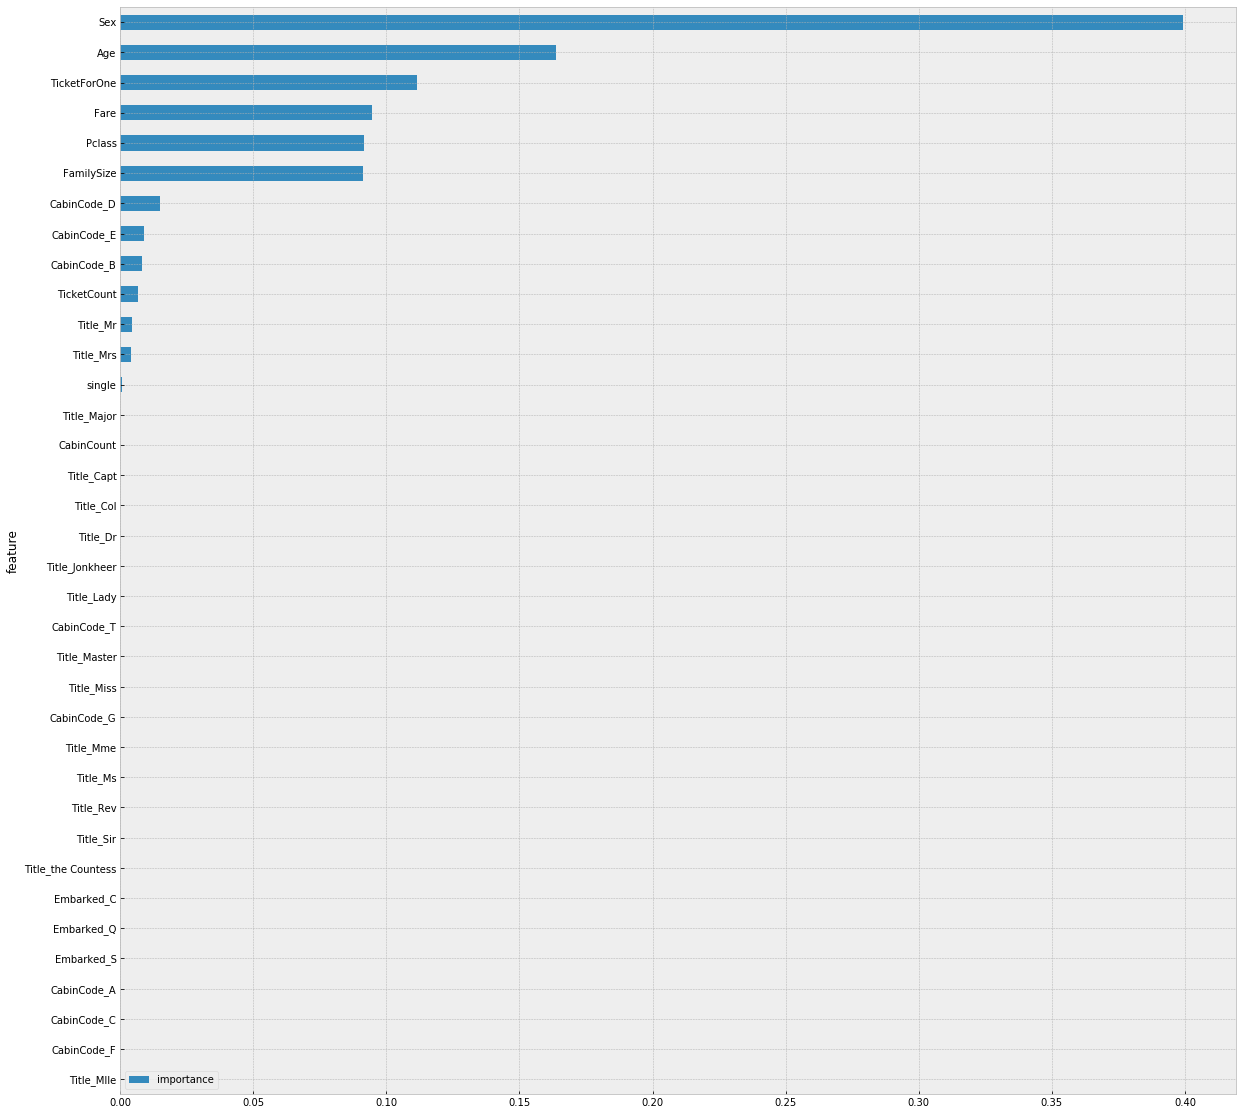

In [240]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = titanic_tree.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 20))

## Random Forest

Random forest
Instead of getting a decision from one tree, it is possible to get the answer from a panel of trees, that is to say a forest. Each tree in the forest is different and is built around a sample of features. It is always better to get an answer from a diverse jury and this way overfitting is limited.

In [241]:
# The forest will have 50 trees 
# and the max number of features by trees is the square root of the total features number
my_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
my_forest = my_forest.fit(X_train, y_train)

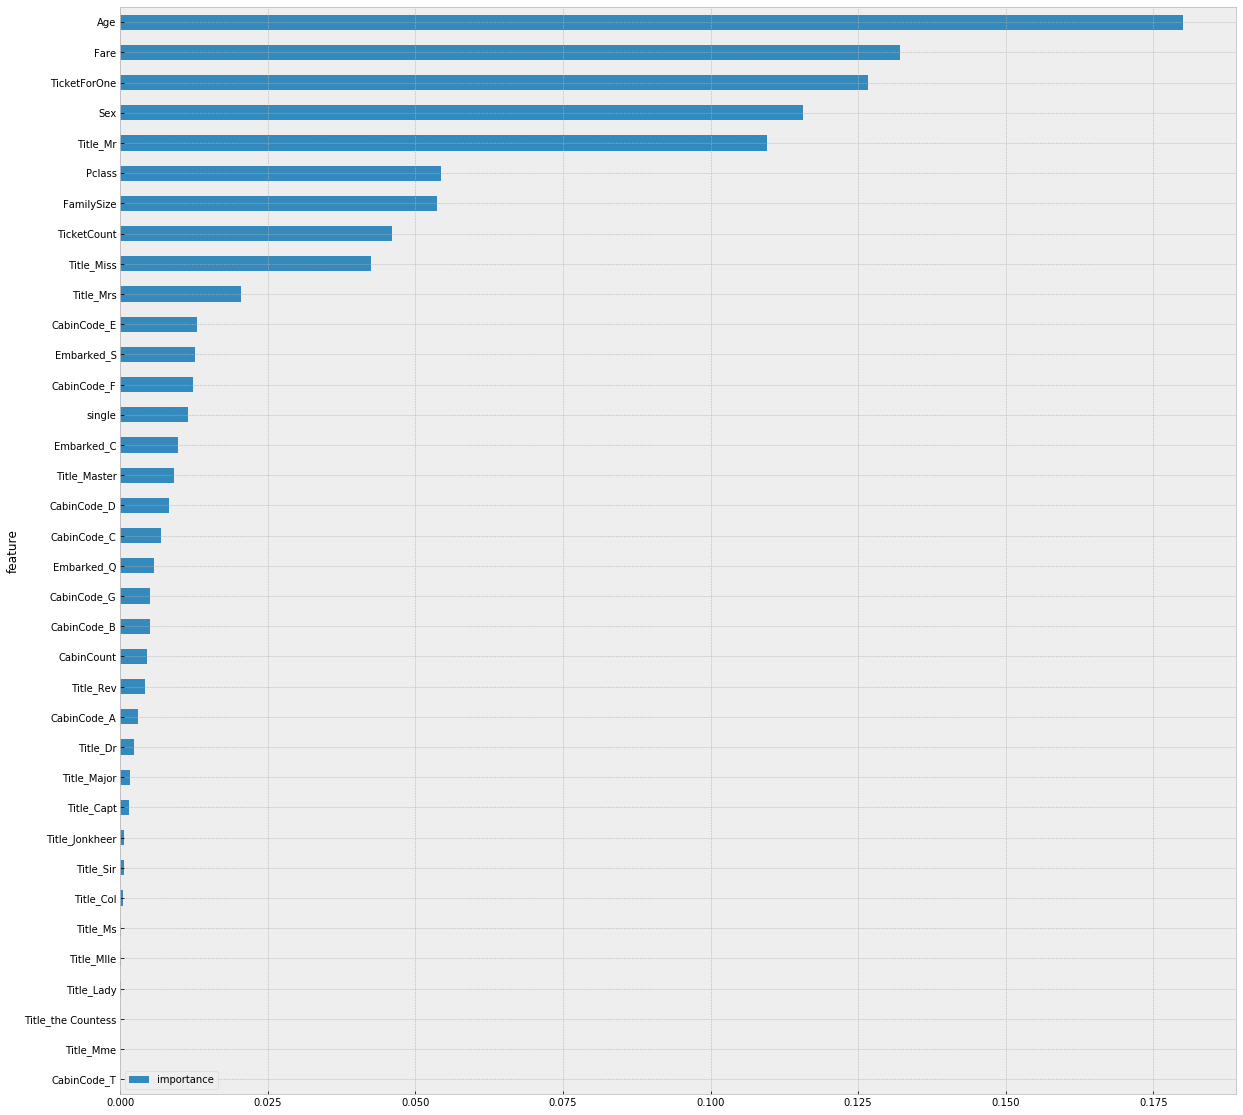

In [242]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = my_forest.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 20))

In [244]:
print("Score of forest on train data: ", my_forest.score(X_test, y_test))

#tr_data["eval_forest"] = my_forest.predict(X_test)

#rmse_tree = np.sqrt(mean_squared_error(tr_data["target"], tr_data["eval_forest"]))
#print("RMSE:", rmse_tree)

Score of forest on train data:  0.7668161434977578


## Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with default hyperparameters
clf = DecisionTreeClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [246]:
predictions = clf.predict(X_test)

In [247]:
clf.score(X_test, y_test)

0.7399103139013453

In [ ]:
#sur_title = y.groupby(["Surname"])
#for surname, sur_grp in sur_title:
#    print("\nFamily: {}".format(surname))
#    
#    for row_index, row in sur_grp.iterrows():
#        title = row["Title"]
#        age = "Not Known" if  np.isnan(row["Age"]) else row["Age"]
#        print("\t{} {} {}".format(title, age, len(sur_grp)))

In [ ]:
#for surname, sur_grp in sur_title:
#    if surname in can_impute:
#        to_use[surname] = {}
#        to_fill[surname] = {}
#        for row_index, row in sur_grp.iterrows():
#            if np.isnan(row["Age"]):
#                to_fill[surname][row["Title"]] = [0, row_index]
#            else:
#                to_use[surname][row["Title"]] = row["Age"]